Primero se importará la información de la base de datos de la nasa para analizar.

In [4]:
import pandas as pd

df = pd.read_csv("A1.3 NASA.csv")

print(df.shape, "\n")
print(df.columns, "\n")
print(df.head(15))

(1503, 6) 

Index(['frecuencia', 'angulo', 'longitud', 'velocidad', 'espesor', 'presion'], dtype='object') 

    frecuencia  angulo  longitud  velocidad   espesor  presion
0          800     0.0    0.3048       71.3  0.002663  126.201
1         1000     0.0    0.3048       71.3  0.002663  125.201
2         1250     0.0    0.3048       71.3  0.002663  125.951
3         1600     0.0    0.3048       71.3  0.002663  127.591
4         2000     0.0    0.3048       71.3  0.002663  127.461
5         2500     0.0    0.3048       71.3  0.002663  125.571
6         3150     0.0    0.3048       71.3  0.002663  125.201
7         4000     0.0    0.3048       71.3  0.002663  123.061
8         5000     0.0    0.3048       71.3  0.002663  121.301
9         6300     0.0    0.3048       71.3  0.002663  119.541
10        8000     0.0    0.3048       71.3  0.002663  117.151
11       10000     0.0    0.3048       71.3  0.002663  115.391
12       12500     0.0    0.3048       71.3  0.002663  112.241
13       

In [14]:
train = df.sample(frac = 0.7)
test = df.drop(train.index)

print("Suma de datos: ",1052+451, "\n")
print("Datos originales: ", 1503, "\n")
print("Train", train.shape, "\n")
print("Test", test.shape, "\n")
print(train.head())

Suma de datos:  1503 

Datos originales:  1503 

Train (1052, 6) 

Test (451, 6) 

      frecuencia  angulo  longitud  velocidad   espesor  presion
4           2000     0.0    0.3048       71.3  0.002663  127.461
526          500     2.7    0.1524       39.6  0.002948  121.009
95         10000     1.5    0.3048       39.6  0.003921  108.991
993        16000     0.0    0.0254       39.6  0.000428  124.986
1033        1000     4.8    0.0254       39.6  0.000907  122.956


In [22]:
import statsmodels.api as sm

x = train.drop("presion", axis = 1)
y = train.presion

model = sm.OLS(y, sm.add_constant(x))
results = model.fit()

print(results.summary(), "\n\n---------------------------\n")
print(results.pvalues)

                            OLS Regression Results                            
Dep. Variable:                presion   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     226.3
Date:                Wed, 20 Aug 2025   Prob (F-statistic):          9.69e-164
Time:                        23:39:10   Log-Likelihood:                -3119.6
No. Observations:                1052   AIC:                             6251.
Df Residuals:                    1046   BIC:                             6281.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        133.2080      0.638    208.833      0.0

Analizando los datos estadísticos obtenidos del modelo generado, podemos notar dos cosas principales.
La primera es que todas las variables tienen un valor p < 0.05, por lo que podemos decir que hay suficiente evidencia estadística para afirmar una relación significativa entre las variables. Por otra parte, la segunda es que, al analizar los estadísticos t de cada una de las variables, podemos observar que la que tiene el mayor valor absoluto es la frecuencia, con lo que puede considerarse de las variables más fuertes del modelo.

In [31]:
import numpy as np

RSE_train = np.sqrt(results.scale)
R2_train = results.rsquared

print("-datos de entrenamiento-")
print("RSE: ", RSE_train)
print("R2: ", R2_train)

-datos de entrenamiento-
RSE:  4.708405143598676
R2:  0.5196478377275154


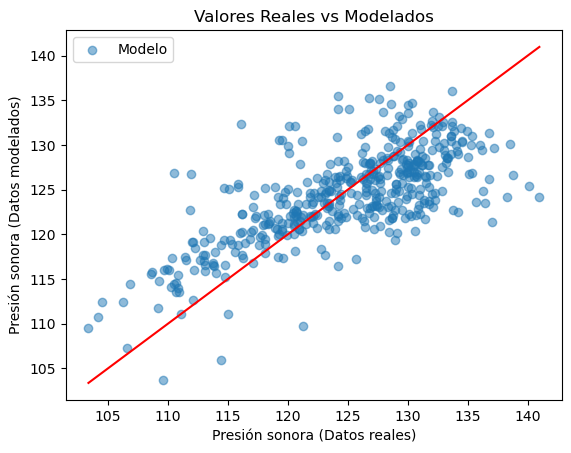

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt

XTest = test.drop('presion', axis = 1)
yhatTest = results.predict(sm.add_constant(XTesst))
YTest = test.presion

plt.scatter(YTest, yhatTest, alpha=0.5, label='Modelo')
plt.plot([YTest.min(), YTest.max()], [YTest.min(), YTest.max()], c = 'r') 
plt.xlabel("Presión sonora (Datos reales)")
plt.ylabel("Presión sonora (Datos modelados)")
plt.title("Valores Reales vs Modelados")
plt.legend()
plt.show()